In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

berita1 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-1.csv'
berita2 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-2.csv'
berita3 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-3.csv'
berita4 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-4.csv'
berita5 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-5.csv'
berita6 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-6.csv'
berita7 = '/content/drive/MyDrive/Datasets/News Classification/inshort_news_data-7.csv'

df1 = pd.read_csv(berita1)
df2 = pd.read_csv(berita2)
df3 = pd.read_csv(berita3)
df4 = pd.read_csv(berita4)
df5 = pd.read_csv(berita5)
df6 = pd.read_csv(berita6)
df7 = pd.read_csv(berita7)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0, ignore_index=True)
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [3]:
df.shape

(12120, 4)

In [6]:
df_baru = df.drop(columns=['news_headline','Unnamed: 0'])
df_baru

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology
...,...,...
12115,Two Indian Air Force doctors who have speciali...,science
12116,NASA's Juno space probe has discovered an FM s...,science
12117,University of Konstanz's researchers have unco...,science
12118,Renowned astrophysicist Professor Shashikumar ...,science


In [7]:
import pandas as pd
import nltk
import re
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('all')
# Kecilkan huruf
df_baru['news_article'] = df_baru['news_article'].apply(lambda x: x.lower())

# LEMMATIZATION
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return ' '.join([lemmatizer.lemmatize(w, pos_dict.get(t, wn.NOUN)) for w, t in nltk.pos_tag(data.split())])

df_baru['news_article'] = df_baru['news_article'].apply(lambda x: lem(x))

# Hapus tanda baca
def cleaner(data):
    return data.translate(str.maketrans('', '', string.punctuation))

df_baru['news_article'] = df_baru['news_article'].apply(lambda x: cleaner(x))

# Hapus nomor
def rem_numbers(data):
    return re.sub('[0-9]+', '', data)

df_baru['news_article'] = df_baru['news_article'].apply(rem_numbers)

# Menghapus stopwords
st_words = set(stopwords.words('english'))  # Assuming English stopwords
def stopword(data):
    return ' '.join([w for w in data.split() if w not in st_words])

df_baru['news_article'] = df_baru['news_article'].apply(lambda x: stopword(x))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [8]:
df_baru.head()

,news_article,news_category
0,deepminds ai system alphafold ha recognised so...,technology
1,microsoft team stop working internet explorer ...,technology
2,china response report u adding chinese chipmak...,technology
3,global smartphone sale third quarter fell year...,technology
4,european union eu hoping u presidentelect joe ...,technology


In [9]:
news_category = pd.get_dummies(df_baru.news_category)
df_baru1 = pd.concat([df_baru, news_category], axis=1)
df_baru1 = df_baru1.drop(columns='news_category')
df_baru1

,news_article,automobile,entertainment,politics,science,sports,technology,world
0,deepminds ai system alphafold ha recognised so...,0,0,0,0,0,1,0
1,microsoft team stop working internet explorer ...,0,0,0,0,0,1,0
2,china response report u adding chinese chipmak...,0,0,0,0,0,1,0
3,global smartphone sale third quarter fell year...,0,0,0,0,0,1,0
4,european union eu hoping u presidentelect joe ...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
12115,two indian air force doctor specialised aerosp...,0,0,0,1,0,0,0
12116,nasas juno space probe ha discovered fm signal...,0,0,0,1,0,0,0
12117,university konstanzs researcher uncovered new ...,0,0,0,1,0,0,0
12118,renowned astrophysicist professor shashikumar ...,0,0,0,1,0,0,0


In [10]:
print(df_baru1.columns.tolist())

['news_article', 'automobile', 'entertainment', 'politics', 'science', 'sports', 'technology', 'world']


In [11]:
judul = df_baru1['news_article'].values
label = df_baru1.drop('news_article', axis=1).values

In [12]:
judul

array(['deepminds ai system alphafold ha recognised solution protein folding grand challenge biology years deepmind showed predict protein fold shapes complex process fundamental understanding biological machinery life alphafold predict shape protein within width atom',
       'microsoft team stop working internet explorer today november user need download team app browse microsoft edge besides microsoft apps service stop supporting internet explorer august microsoft also pull support microsoft edge legacy desktop app march',
       'china response report u adding chinese chipmaker smic national offshore oil producer cnooc defence blacklist said hoped u erect barrier obstacle cooperation reuters reported president donald trumps administration poised add smic cnooc list company allegedly owned controlled chinese military',
       ...,
       'university konstanzs researcher uncovered new state matter liquid glass previously unknown structural elements used model system involving suspens

In [13]:
label

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
from sklearn.model_selection import train_test_split
judul_train, judul_val, label_train, label_val = train_test_split(judul, label, test_size=0.2, random_state=123)

In [15]:
max_len = 256

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(lower=True, char_level=False)
tokenizer.fit_on_texts(judul_train)
tokenizer.fit_on_texts(judul_val)

sequences_train = tokenizer.texts_to_sequences(judul_train)
sequences_val = tokenizer.texts_to_sequences(judul_val)

padded_train = pad_sequences(sequences_train, maxlen=max_len)
padded_val = pad_sequences(sequences_val, maxlen=max_len)

word_to_index = tokenizer.word_index

In [16]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
embedding_dim = 100

In [17]:
import numpy as np
embeddings_index = {};

with open('/content/drive/MyDrive/Datasets/Video Game Ratings and Reviews Dataset/glove/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# Ensure that vocab_size matches the expected size
embeddings_matrix = np.zeros((vocab_size + 1, embedding_dim))

for word, i in word_to_index.items():
    if i <= vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_matrix[i] = embedding_vector

In [20]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, embedding_dim, weights=[embeddings_matrix], trainable=False, input_length=max_len),
    tf.keras.layers.LSTM(256, return_sequences=False),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 100)          2294300   
                                                                 
 lstm_1 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [21]:
class callback_acc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91):
      self.model.stop_training = True

callback_acc = callback_acc()

num_epochs = 50
history = model.fit(padded_train,
                    label_train,
                    epochs=num_epochs,
                    batch_size=32,
                    callbacks=[callback_acc],
                    validation_data=(padded_val, label_val), verbose=1)

Epoch 1/50
  5/303 [..............................] - ETA: 8s - loss: 0.6644 - accuracy: 0.1250

303/303 [==============================] - 10s 17ms/step - loss: 0.3203 - accuracy: 0.4939 - val_loss: 0.1710 - val_accuracy: 0.7966
Epoch 2/50
303/303 [==============================] - 5s 16ms/step - loss: 0.1583 - accuracy: 0.8260 - val_loss: 0.0991 - val_accuracy: 0.8791
Epoch 3/50
303/303 [==============================] - 5s 16ms/step - loss: 0.1156 - accuracy: 0.8891 - val_loss: 0.0825 - val_accuracy: 0.8985
Epoch 4/50
303/303 [==============================] - 4s 15ms/step - loss: 0.0963 - accuracy: 0.9058 - val_loss: 0.0729 - val_accuracy: 0.9175
Epoch 5/50
303/303 [==============================] - 5s 16ms/step - loss: 0.0868 - accuracy: 0.9137 - val_loss: 0.0695 - val_accuracy: 0.9187


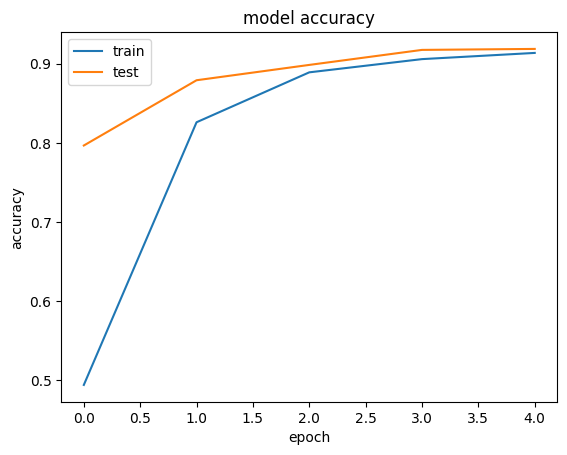

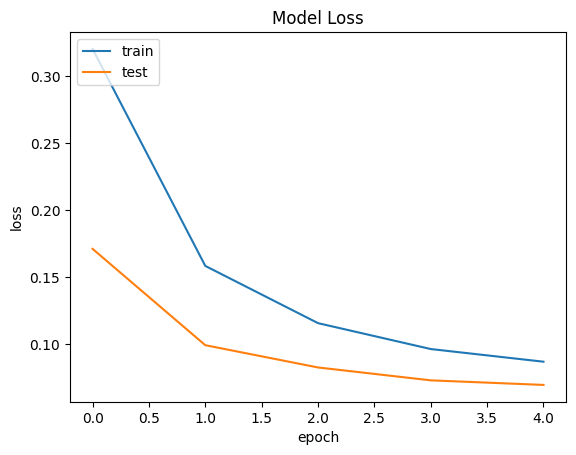

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

```
Nama : Rahmat Pratami
Email : exzaardyansyah894@gmail.com
```